## Decision Tree

### load dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=911)

variables = {
    'x_train': x_train,
    'x_test': x_test,
    'y_train': y_train,
    'y_test': y_test
}

for name, var in variables.items():
    print(f"shape of {name} = {var.shape}")

shape of x_train = (105, 4)
shape of x_test = (45, 4)
shape of y_train = (105,)
shape of y_test = (45,)


### Training Model

In [8]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=911)

In [9]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=911)

In [10]:
y_pred = decision_tree.predict(x_test)

In [12]:
from sklearn.metrics import f1_score, confusion_matrix

print(f"f1 score = {f1_score(y_test, y_pred, average='macro')}")
print(confusion_matrix(y_test, y_pred))

f1 score = 0.9553571428571429
[[15  0  0]
 [ 0 13  0]
 [ 0  2 15]]


### Visualization

In [13]:
from sklearn.tree import export_text, plot_tree

In [15]:
print(export_text(decision_tree, feature_names=iris.feature_names))

|--- petal width (cm) <= 0.75
|   |--- class: 0
|--- petal width (cm) >  0.75
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.65
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



[Text(0.375, 0.875, 'x[3] <= 0.75\ngini = 0.666\nsamples = 105\nvalue = [35, 37, 33]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.65\ngini = 0.498\nsamples = 70\nvalue = [0, 37, 33]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[2] <= 5.35\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

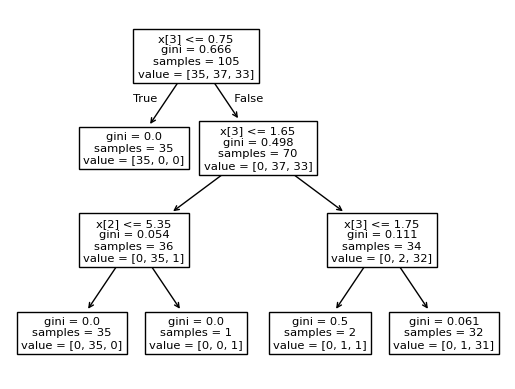

In [16]:
plot_tree(decision_tree)

## SVM

### Dataset visualiazation

In [23]:
import matplotlib.pyplot as plt

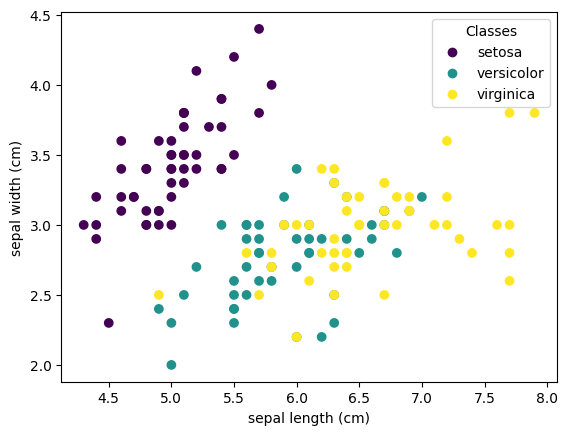

In [24]:
_, ax = plt.subplots()
scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['label'])
ax.set(xlabel=df.columns[0], ylabel=df.columns[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names[:],
loc="upper right", title="Classes")

In [25]:
df_new = df[df['label'] != 2]
df_new

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


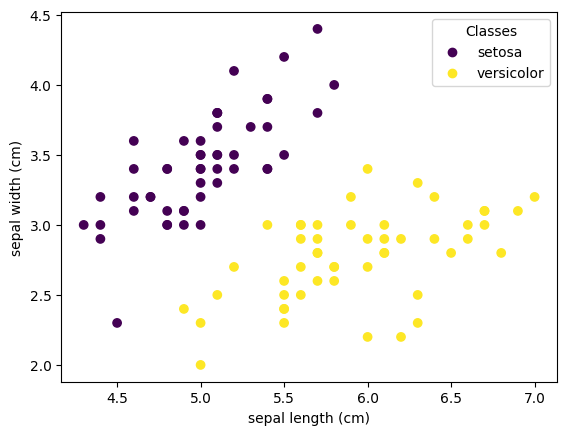

In [26]:
_, ax = plt.subplots()
scatter = ax.scatter(df_new.iloc[:, 0], df_new.iloc[:, 1], c=df_new['label'])
ax.set(xlabel=df_new.columns[0], ylabel=df_new.columns[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names[:],
loc="upper right", title="Classes")

In [27]:
x = df_new.iloc[:, :2]
y = df_new['label']

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

variables = {
    'x_train': x_train,
    'x_test': x_test,
    'y_train': y_train,
    'y_test': y_test
}

for name, var in variables.items():
    print(f"shape of {name} = {var.shape}")

shape of x_train = (70, 2)
shape of x_test = (30, 2)
shape of y_train = (70,)
shape of y_test = (30,)


### Training model

In [30]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [31]:
y_pred = svm.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1])

### Result visualization

In [36]:
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

def get_minmax(X):
    d = 0.25
    return np.min(X[:,0])-d, np.max(X[:,0])+d, np.min(X[:,1])-d, np.max(X[:,1])+d,

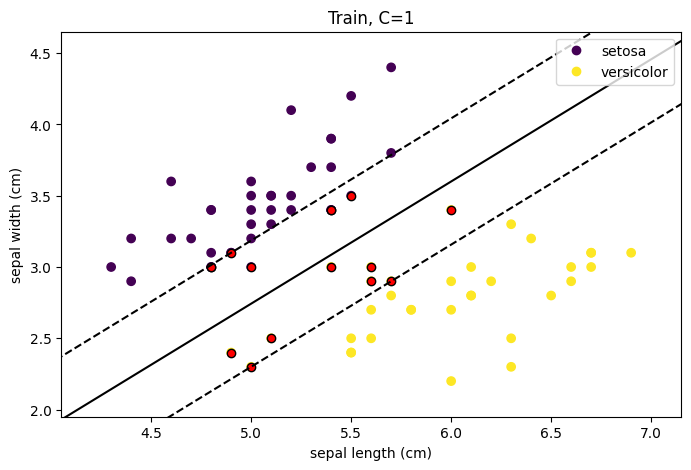

In [38]:
plt.figure(figsize=(8, 5))
plt.title("Train, C=1")

ax = plt.gca()
x_min, x_max, y_min, y_max= get_minmax(x_train.to_numpy()) # 그래프범위설정
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp= DecisionBoundaryDisplay.from_estimator(svm, x_train, plot_method='contour',
response_method="decision_function", ax=ax, levels=[-1, 0, 1], colors=["k", "k", "k"], linestyles=["--", "-", "--"])
scatter = disp.ax_.scatter(x_train.iloc[:,0], x_train.iloc[:,1], c=y_train)
disp.ax_.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], facecolors="red", edgecolor='k')
disp.ax_.legend(scatter.legend_elements()[0], iris.target_names[:2])

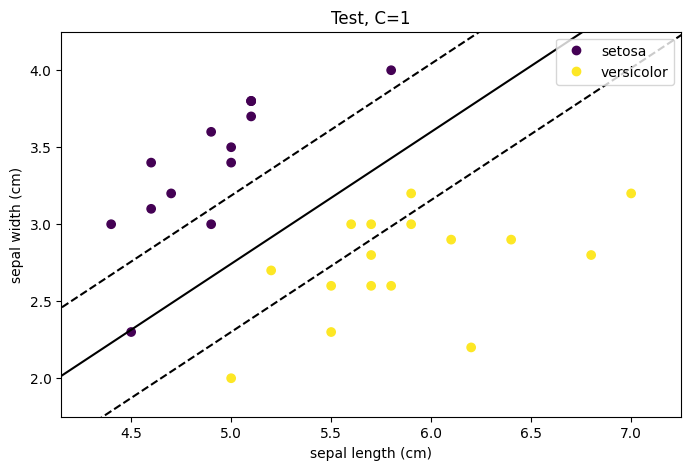

In [39]:
plt.figure(figsize=(8, 5))
plt.title("Test, C=1")

ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(x_test.to_numpy())
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp = DecisionBoundaryDisplay.from_estimator(svm, x_test, plot_method='contour',
response_method="decision_function", ax=ax, levels=[-1, 0, 1], colors=["k", "k", "k"], linestyles=["--", "-", "--"])
scatter = disp.ax_.scatter(x_test.iloc[:,0], x_test.iloc[:,1], c=y_test)
disp.ax_.legend(scatter.legend_elements()[0], iris.target_names[:2])

### Strong regulation

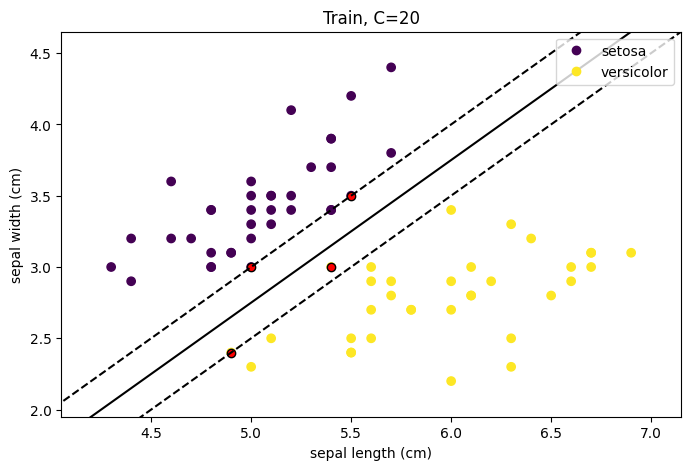

In [40]:
svm_model= SVC(kernel='linear', C=20)
svm_model.fit(x_train, y_train)

plt.figure(figsize=(8, 5))
plt.title("Train, C=20")
ax = plt.gca()
x_min, x_max, y_min, y_max= get_minmax(x_train.to_numpy())
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
disp= DecisionBoundaryDisplay.from_estimator(svm_model, x_train, plot_method='contour',
response_method="decision_function", ax=ax, levels=[-1, 0, 1], colors=["k", "k", "k"], linestyles=["--", "-", "--"])
scatter = disp.ax_.scatter(x_train.iloc[:,0], x_train.iloc[:,1], c=y_train)
disp.ax_.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], facecolors="red", edgecolor='k')
disp.ax_.legend(scatter.legend_elements()[0], iris.target_names[:2])

### Moon data

In [41]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=2000, noise=0.1, random_state=10)

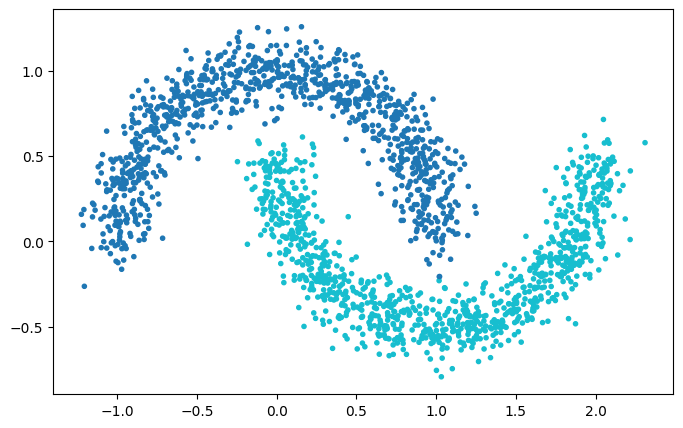

In [42]:
x1 = x[:, 0]
x2 = x[:, 1]
plt.figure(figsize=(8, 5))
plt.scatter(x1, x2, c=y, marker='.', cmap='tab10')
plt.show()

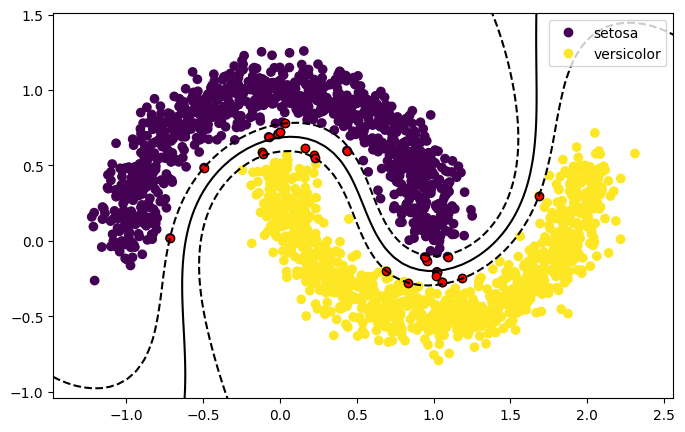

In [43]:
svm_moon = SVC(kernel='rbf', C=20)
svm_moon.fit(x, y)

plt.figure(figsize=(8, 5))
ax = plt.gca()
x_min, x_max, y_min, y_max= get_minmax(x)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
disp= DecisionBoundaryDisplay.from_estimator(svm_moon, x, plot_method='contour', response_method="decision_function",
ax=ax, levels=[-1, 0, 1], colors=["k", "k", "k"], linestyles=["--", "-", "--"])
scatter = disp.ax_.scatter(x1, x2, c=y)
disp.ax_.scatter(svm_moon.support_vectors_[:,0], svm_moon.support_vectors_[:,1], facecolors="red", edgecolor='k')
disp.ax_.legend(scatter.legend_elements()[0], iris.target_names[:2])